# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса **Яндекс.Недвижимость** — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.   
**Задача** — установить параметры, определяющие рыночную стоимость объектов недвижимости. 
Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<span style="color:blue">**Дополнительные задачи:** </span> 
1. Сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — долгими.
2. Какие факторы больше всего влияют на общую (полную) стоимость объекта
3. Какая самая высокая и низкая стоимость квадратного метра в  10 населённых пунктах с наибольшим числом объявлений. 
4. Как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге. 

<span style="color:green">**План проекта:**</span> 
1. **Шаг 1.** Открыть файл с данными и ознакомиться с общей информацией
- Оценить количество и природу пропусков
- Посмотреть дубликаты
2. **Шаг 2.** Предобработка данных
- Найти и изучите пропущенные значения
- Преобразовать типы данных  
- Выявить и изучить уникальные значения, устранить дубликаты. 
3. **Шаг 3.** Добавить в таблицу новые недостающие данные:
- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «‎первый», «последний», «другой»);
- расстояние до центра города в километрах (переведите из м в км и округлите до целых значений). 
- Выявить и устранить редкие и выбивающиеся значения. 
4.**Шаг 4.** Проведите исследовательский анализ данных:
- Изучить параметры, влияющие на стоимость объекта недвижимости.
- Проанализировать как быстро продавались квартиры
- Сравнить среднюю цену одного кв.метра в ТОП-10 населённых пунктах.
- Оценить зависимость стоимости объектов от удаленности до центра города.
5.**Общий вывод**.

<span style="color:green">**Описание данных**</span> 

- **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
- **balcony** - наличие балкона
- **ceiling_height** — высота потолков (м)
- **cityCenters_nearest** — расстояние до центра города (м)
- **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)
- **first_day_exposition** — дата публикации
- **floor** — этаж
- **floors_total** — всего этажей в доме
- **is_apartment** — апартаменты (булев тип)
- **kitchen_area** — площадь кухни в квадратных метрах (м²)
- **last_price** — цена на момент снятия с публикации
- **living_area** — жилая площадь в квадратных метрах(м²)
- **locality_name** — название населённого пункта
- **open_plan** — свободная планировка (булев тип)
- **parks_around3000**— число парков в радиусе 3 км
- **parks_nearest** — расстояние до ближайшего парка (м)
- **ponds_around3000** — число водоёмов в радиусе 3 км
- **ponds_nearest** — расстояние до ближайшего водоёма (м)
- **rooms** — число комнат
- **studio** — квартира-студия (булев тип)
- **total_area** — площадь квартиры в квадратных метрах (м²)
- **total_images** — число фотографий квартиры в объявлении

### ШАГ 1. Открыть файл с данными и изучить общую информацию. 

<span style="color:brown">**Импортируем все необходимые для работы библиотеки: для распаковки датафрейма, построения гистограмм, диаграмм и таблиц.**</span> 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
try:
    data= pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data= pd.read_csv('real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Вывод:** Что сразу бросается в глаза: 
1. Очень много NaN, и в булевых параметрах, и в числовых. 
2. Есть пропуски, которые понятны и объяснимы, например, в столбце "balcony", скорее всего балкона просто нет. А вот отсутствие данных в стобцах "ceiling_height" (высота потолка) или "days_exposition"(сколько дней было размещено объявление) имеют другой характер.
3. Есть некорректные данные и аномалии.    
- Посмотрим сколько таких пропусков и в зависимости от количества будем принимать решение, что с ними делать.    

In [4]:
#Выведем общую информацию о датафрейме
data.info()
print('\nЧисло дубликатов:', data.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод:** Итак, всего 23699 объектов недвижимости. В некоторых столбцах есть пропущенные значения и некорректный тип данных. Явные дубликаты отсутствуют.*

<span style="color:brown">**Построим общую гистограмму для всех числовых столбцов таблицы.** </span>

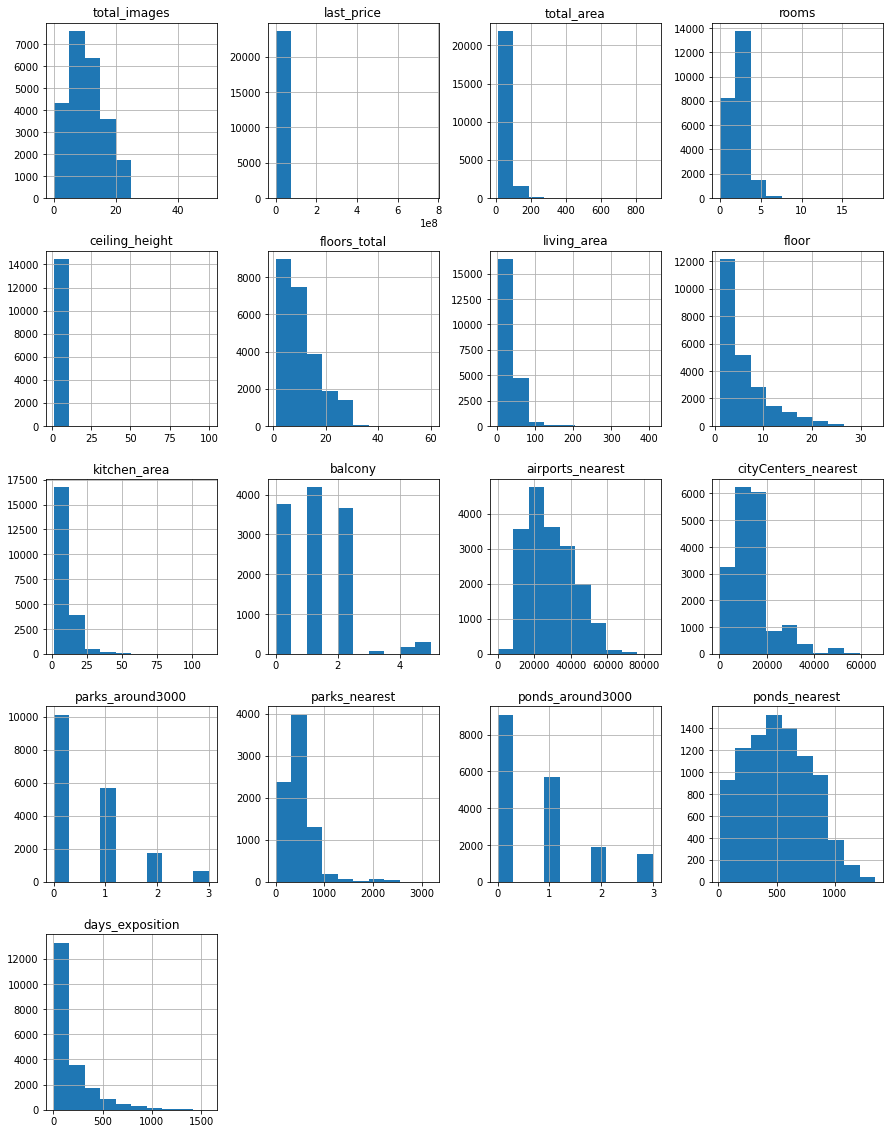

In [5]:
data.hist(figsize= (15, 20));

Гистограмма показывает, с какой частотой в наборе данных встречается то или иное значение. Визуальное сопрвождение данных.

### ШАГ 2. Предобработка данных

<span style="color:brown">**Находим и изучаем пропущенные значения** </span>

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**По порядку:**
1. "ceiling_height"(высота потолков). Пропущено около 40% данных (9195/23699*100 =38,8%). Также встречаются аномалии (потолок 100м, 27м или 1м). Скорее всего, человеческий фактор, ошибка при вводе данных.
2. "floors_total"(всего этажей в доме). Пропущено около 0,4% данных (86/23699*100 =0,36%). Это важный признак, который мы будем учитывать при анализе.   
3. "living_area"(жилая площадь в квадратных метрах(м²)) и "kitchen_area"(площадь кухни в квадратных метрах (м²)). Однотипные параметры, их пропуски составляют 7,9%, 9,4% соответственно. Это также важный критерий для анализа данных.
4. "balcony"(наличие балкона). Пропущено примерно половина значений, 48,6%. Предположим, что их просто нет.
5. "locality_name"(название населённого пункта). Пропущено (49/23699*100 =0,2%). Также будем брать для анализа.
6. "cityCenters_nearest"(расстояние до центра города (м)). Пропущено 23,3% значений. Этот критерий также важен для оценки, поэтому берем в обработку.
7. "days_exposition"(сколько дней было размещено объявление (от публикации до снятия)). (3181/23699*100 =13,4%).Без этих данных тоже не обойтись, берем в обработку.

Остались еще столбцы с пропусками: Апартаменты, расстояние до ближайшего аэропорта, число парков в радиусе 3 км, расстояние до ближайшего парка, число водоемов в радиусе 3 км, расстояние до ближайшего водоема. Эти признаки также будем использовать в расчетах и исследовании, берем в обработку.

<span style="color:brown">**Обработаем пропуски там, где это возможно и нужно для дальнейшего исследования:** </span>

- В столбце **"is_apartment"** всего 50 значений "ИСТИНА", всё остальное NaN, поменяем тип данных на "нет"(False).

In [7]:
data['is_apartment']= data['is_apartment'].fillna(value= False)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


- Поработаем с пропущенными значениями балконов, заменим NaN на ноль.

In [8]:
data['balcony']= data['balcony'].fillna(value= 0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


- Теперь удалим пропуски в тех строках, где пропусков было меньше всего, это **'floors_total'**(всего этажей в доме), 0.4%. Этот параметр нельзя заменить средним, медианным или часто встречающимся числом, поэтому просто удалим его, также поступим и с **'locality_name'**(название населённого пункта): 0.2% от всех данных, на общий результат не повлияет. 

In [9]:
#используем метод "dropna"
data['locality_name'].dropna(inplace=True)
data['floors_total'].dropna(inplace=True)

- Поработаем с высотой потолков. В Санкт-Петербурге есть "сталинки" и с 4-ёх, и с 5-ти метровыми потолками, есть и 2,5-2,8 м, в основном, в новостройках и "хрущевках". Это нормально, но вот значения 27 м, 100 м потолки - это, конечно же, ошибка. Поэтому, заменим пропущенные значения на медианное, а с аномалиями("выбросами") разберемся чуть позже.*

In [10]:
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)

<span style="color:brown">**Обработаем некорректные типы данных** </span>

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        23699 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Вывод:** Датасэт содержит данные по 22 признакам: 17 количественных, 4 категориальных и 1 временной. Изменим тип данных на корректный, необходимый для дальнейшего исследования.*

In [12]:
data['last_price'] = data['last_price'].astype('int')
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['balcony'] = data['balcony'].astype('int')

#data['days_exposition'] = data['days_exposition'].fillna(value=0).astype('int')
data['floors_total']= data['floors_total'].fillna(value=0).astype('int')

# преобразуем еще в целочисленные значения количество парков и прудов, возможно понадобятся, хотя пока не знаю, как их использовать
data['parks_around3000']= data['parks_around3000'].fillna(value=0).astype('int')
data['ponds_around3000']= data['ponds_around3000'].fillna(value=0).astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int64         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

**Вывод:** Теперь все типы данных подготовлены для проведения исследования.

<span style="color:brown">**Поищем неявные дубликаты** </span>
- явных дубликатов нет, это мы выяснили ранее
- неявные чаще встречаются в тексте, где присутствует "ручной" ввод, ошибка, "человеческий фактор". Поэтому исследуем названия населенных пунктов.

In [13]:
('Количество населенных пунктов:', data['locality_name'].unique().shape[0])

('Количество населенных пунктов:', 365)

**Что видим:**
- в данных есть название одного и того же населенного пункта, но прописанного разными способами. Например: "поселок Возрождение" и "посёлок Возрождение". Для нас это будет два разных пункта, это неверно.
- "поселок городского типа" и "городской поселок".
- можно было привести всё к нижнему регистру, чтобы исключить дубликаты и здесь, но визуально не обнаружили. Чтобы названия населенных пунктов выглядели корректно, оставим как есть.

In [14]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')# заменим все "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('городской поселок','поселок городского типа')# заменим "городской поселок" на "поселок городского типа"
('Количество населенных пунктов:', data['locality_name'].unique().shape[0])

('Количество населенных пунктов:', 324)

In [15]:
data['locality_name'].unique()# проверим что получилось

array(['Санкт-Петербург', 'поселок Шушары',
       'поселок городского типа Янино-1', 'поселок Парголово',
       'поселок Мурино', 'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин',
       'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Федоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посел

**Вывод:** Теперь и здесь порядок. Неявных дубликатов было 41. Двигаемся дальше.

 <span style="color:brown">**Как правило, в данных всегда присутствуют аномальные значения, их обязательно нужно устранить, для этого посмтрим как распределены значения в датасэте.**</span>

In [16]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000,21796.000000,23699.000000,21421.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.724358,10.635090,34.457852,5.892358,10.569807,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,0.988298,6.616396,22.030445,4.885249,5.905438,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<span style="color:brown">**Что сразу бросается на первый взгляд, по-порядку:**</span>
- Аномальные значения есть в нескольких столбцах:
   - **'last_price'**: есть жилье стоимостью и 12 190, и 763 000 000.
   - **'total_area'**: общая площадь от 12 кв.м до 900 кв.м.
   - **'kitchen_area'**: разбег значений площади кухни от 1,3 кв.м до 112 кв.м
   - **'living_area'**: жилая площадь соответственно имеет "выбросы" 2 кв.м. и 409 кв.м
   - **'days_exposition'**: объявления также "висят" более 4 лет.
   - **'ceiling_height'**: высота потолков варьируется от 1м до 100м.
   - **'rooms'**: 19 комнат и их отсутствие тоже аномально.

*Поработаем с аномалиями, но чуть позже, сначала добавим недостающие столбцы(данные), так, чтобы они корректно коррелировали со всеми текущими значениями.*

### ШАГ 3. Посчитайте и добавьте в таблицу новые столбцы

<span style="color:brown">Рассчитаем и добавим в таблицу столбец **['square_meter_price']** цена одного квадратного метра. Для этого разделим стоимость жилья на общую площадь жилья</span>

In [17]:
data['square_meter_price']= data['last_price']/ data['total_area']
data['square_meter_price']= data['square_meter_price'].fillna(value= 0).astype('int')

<span style="color:brown">Добавим день публикации объявления **['weekday']** (0 - понедельник, 1 - вторник и т.д.). Используем метод DatetimeIndex</span>

In [18]:
data['weekday']= data['first_day_exposition'].dt.weekday

<span style="color:brown">Добавим месяц публикации объявления **['month']**. Используем метод DatetimeIndex.</span>

In [19]:
data['month']= data['first_day_exposition'].dt.month

<span style="color:brown">Добавим год публикации объявления **['year']**. Используем метод DatetimeIndex</span>

In [20]:
data['year']= data['first_day_exposition'].dt.year

<span style="color:brown">Добавим тип этажа квартиры **['floor_type']**(значения — «первый», «последний», «другой»)*. Здесь воспользуемся функцией, назначим категории.</span>

In [21]:
def floor_number(row):
    if row['floor']== 1:
        return 'первый'
    elif row['floor']== row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type']= data.apply(floor_number, axis=1)

<span style="color:brown">Добавим расстояние в км до центра города **['distance_to_center']**.</span>

In [22]:
data.rename(columns= {'cityCenters_nearest' : 'city_centers_nearest'}, inplace= True)# приведем название к единому формату
data['distance_to_center']= data['city_centers_nearest']/ 1000 # метры переводим в км и округляем до целого
data['distance_to_center']= data['distance_to_center'].fillna(value= 0).astype(int)

In [23]:
data.head()# проверяем, все ли столбцы добавлены

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,floor_type,distance_to_center
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920,1,12,2018,первый,18
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785,3,8,2015,другой,13
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176,4,7,2015,другой,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000,1,6,2018,другой,8


**Вывод:** Все столбцы в нужном нам формате добавлены в таблицу.

<span style="color:brown">**Вот теперь разберемся с аномалиями.**
  Чтобы не перебирать все столбцы с аномалиями отдельно, воспользуемся функцией, которая на вход получит сам признак(коллонки с аномалиями), а на выходе вернет границы "усов" с 1,5 размахом. Затем прогоним ее по циклу списком **'anomaly_list'** из столбцов</span>

In [24]:
def function_q(data, column):
    q1= data[column].quantile(0.25)
    q3= data[column].quantile(0.75)
    iqr= q3 - q1# межквартильный размах
    data_ig= data.loc[(data[column]< q3 + 1.5*iqr) & (data[column]> q1- 1.5*iqr), column]# границы "усов"
    return data_ig
# составим список столбцов, где выявили "аномалии"
anomaly_list= ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for x in anomaly_list:# каждое значение из каждой колонки пропускаем циклом через функцию
    data[x]= function_q(data, x)

# rooms должно быть целым числом
data['rooms']= data['rooms'].fillna(value= 0).astype('int')
data.describe() 

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meter_price,weekday,month,year,distance_to_center
count,23699.000000,2.163800e+04,22459.000000,23699.000000,20727.000000,23699.000000,21023.000000,23699.000000,20219.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,18849.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,4.839970e+06,54.364907,2.013545,2.631264,10.635090,31.552247,5.892358,9.504662,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,128.753886,9.942121e+04,2.569307,6.400101,2017.367146,10.505633
std,5.682529,2.217341e+06,19.385325,0.986846,0.081300,6.616396,13.941065,4.885249,3.125573,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,121.531193,5.030681e+04,1.789082,3.491561,1.039771,9.507281
min,0.000000,1.219000e+04,12.000000,0.000000,2.460000,0.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.110000e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.600000,5.000000,18.400000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,41.000000,7.658500e+04,1.000000,3.000000,2017.000000,2.000000
50%,9.000000,4.400000e+06,50.100000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,85.000000,9.500000e+04,3.000000,6.000000,2017.000000,11.000000
75%,14.000000,6.000000e+06,65.600000,3.000000,2.650000,16.000000,41.000000,8.000000,11.100000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,183.000000,1.142560e+05,4.000000,10.000000,2018.000000,15.000000
max,50.000000,1.189440e+07,114.600000,5.000000,2.850000,60.000000,77.800000,33.000000,19.450000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,512.000000,1.907500e+06,6.000000,12.000000,2019.000000,65.000000


**Вывод:** Теперь всё выглядит иначе, все значения корректны, имеют адекватные границы. Немного смутило здание в 60 этажей), но оказалось, что есть и 88- миэтажное строение.

### ШАГ 4.Проведите исследовательский анализ данных

<span style="color:brown">**Изучим основные параметры по порядку, для этого воспользукмся визуализацией, пострим гистограммы. Начнем с общей площади.**</span>

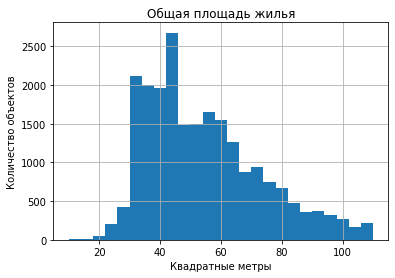

In [25]:
data['total_area'].hist(bins=25, range=(10,110))
plt.title('Общая площадь жилья')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()

**Вывод:** Больше всего квартир с площадью от 30-ти до 60 кв.м. Это, как правило, "студии", однокомнатное и 2-ух комнатное жилье.*

<span style="color:brown">**Изучим жилую площадь**</span>

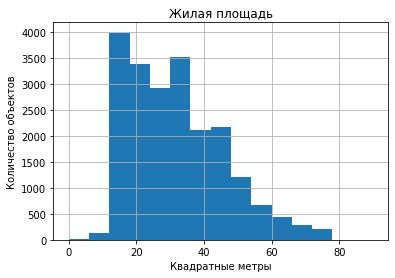

In [26]:
data['living_area'].hist(bins= 15, range= (0,90))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()

**Вывод:** Жилая площадь от 10 до 38-40 кв.м.*, что ориентировочно, соответствует однокомнатному и 2-ух комнатному жилью. 

<span style="color:brown">**Изучим площадь кухни**</span>

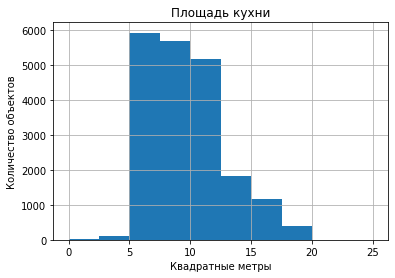

In [27]:
data['kitchen_area'].hist(bins= 10, range= (0,25))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество объектов')
plt.show()

**Вывод:** Кухни, в основном, с площадью от 5-ти до 12 кв.м.

<span style="color:brown">**Изучим цену объекта недвижимости**</span>

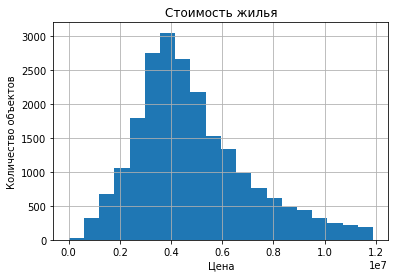

In [28]:
#data['last_price'] = data['last_price']/1000000
#data['last_price'].fillna(value=0).astype('int')#разделим на 1000000, чтобы привести значения в понятный вид
data['last_price'].hist(bins =20, range =(0,1.189440e+07))
plt.title('Стоимость жилья')
plt.xlabel('Цена')
plt.ylabel('Количество объектов')
plt.show()

**Вывод:** В основном, стоимость квартир находится в пределах до 6 млн.

<span style="color:brown">**Изучим количество комнат**</span>

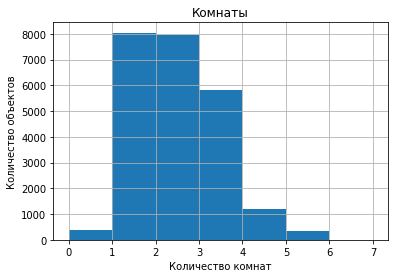

In [29]:
data['rooms'].hist(bins= 7, range= (0,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов')
plt.show()

**Вывод:** Ноль комнат - это скорее всего, "квартиры-студии", 6 комнат тоже возможно, это старые "коммуналки". И тех и других, примерно, равное количество, примерно, 1,7% каждого сегмента от всего количества объектов выборки.

<span style="color:brown">**Изучим высоту потолков**</span>

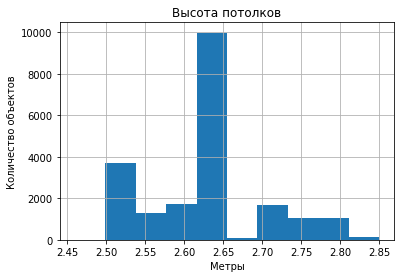

In [30]:
data['ceiling_height'].hist(bins= 10)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество объектов')
plt.show()

**Вывод:** Высота потолков для нашей выборки не более 3,14. Есть совсем немного жилья с потолками около 2,3 м. С большей частотой встречаются потолки 2,5 метра. 

<span style="color:brown">**Изучим этаж объекта**</span>

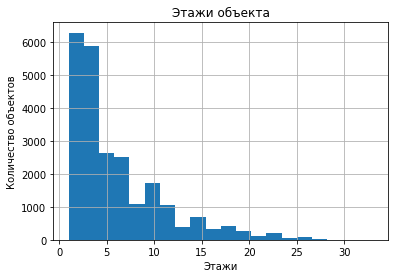

In [31]:
data['floor'].hist(bins= 20)
plt.title('Этажи объекта')
plt.xlabel('Этажи')
plt.ylabel('Количество объектов')
plt.show()

**Вывод:** Чаще всего встречается жилье на от 1-ого до 4-ого этажа.

<span style="color:brown">**Изучим тип этажа квартиры («первый», «последний», «другой»)**</span>

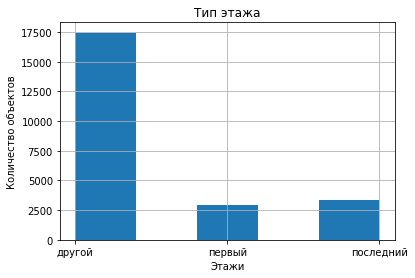

In [32]:
data['floor_type'].hist(bins= 5)
plt.title('Тип этажа')
plt.xlabel('Этажи')
plt.ylabel('Количество объектов')
plt.show()

**Вывод:** Чаще всего - это не первый и не последний этажи. Квартиры с такой этажностью очень трудно сдать/продать через сайт, обращаются в агенство.

<span style="color:brown">**Изучим общее количество этажей в доме**</span>

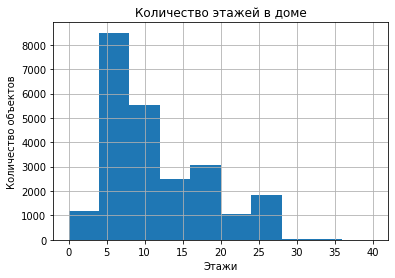

In [33]:
data['floors_total'].hist(bins=10, range=(0,40))
plt.title('Количество этажей в доме')
plt.xlabel('Этажи')
plt.ylabel('Количество объектов')
plt.show()

**Вывод:** Больше всего жилья сдают/продают в 5-тиэтажных домах, чуть меньше в новостройках.

<span style="color:brown">**Изучим расстояние до центра города в метрах**</span>

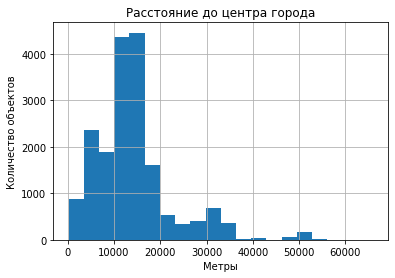

In [34]:
data['city_centers_nearest'].hist(bins= 20)
plt.title('Расстояние до центра города')
plt.xlabel('Метры')
plt.ylabel('Количество объектов')
plt.show()

**Вывод:** Жилье в центре и на окраине реже встречается в объявлении, чаще это удаленность от центра до 15 км. Для такого города как СПб, это не расстояние.

<span style="color:brown">**Изучим расстояние до до ближайшего аэропорта**</span>

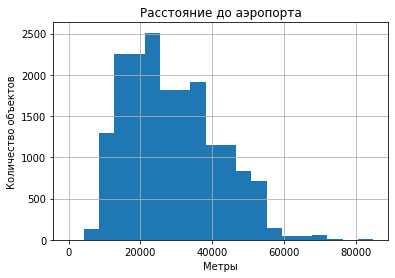

In [35]:
data['airports_nearest'].hist(bins= 20)
plt.title('Расстояние до аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество объектов')
plt.show()

**Вывод:** Ближе к аэропорту количество квартир становится меньше.

<span style="color:brown">**Изучим расстояние до до ближайшего парка**</span>

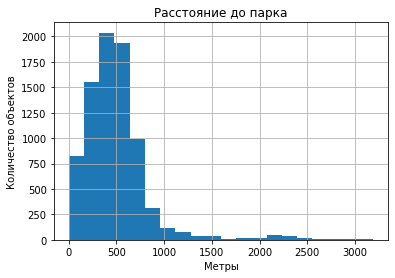

In [36]:
data['parks_nearest'].hist(bins= 20)
plt.title('Расстояние до парка')
plt.xlabel('Метры')
plt.ylabel('Количество объектов')
plt.show()

**Вывод:** В СПб действительно много мест для отдыха, в том числе, парков. Практичски все жилье находится на расстоянии не более полукилометра. Самое большое - 3 км, но это единичные случаи.

<span style="color:brown">**Изучим день и месяц публикации объявления**</span>

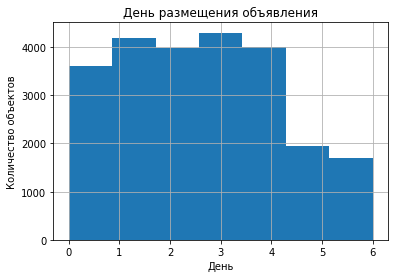

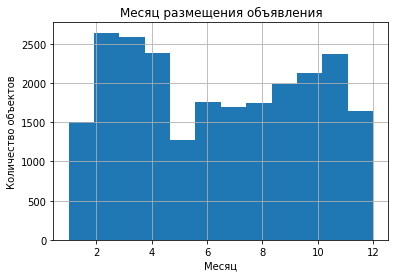

In [37]:
data['weekday'].hist(bins= 7)#день недели
plt.title('День размещения объявления')
plt.xlabel('День')
plt.ylabel('Количество объектов')
plt.show()

data['month'].hist(bins= 12)#месяц
plt.title('Месяц размещения объявления')
plt.xlabel('Месяц')
plt.ylabel('Количество объектов')
plt.show()

**Вывод:** Объявления размещаются в рабочие дни, точнее, со вторника по пятницу (на выходных занимаются просмотром объектов), что логично. Что касается сезонности, то это весенне-осенний период.

<span style="color:blue">**Задание №1: Сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — долгими.**</span> 
- Построим гистограмму
- Посчитаем среднее и медиану

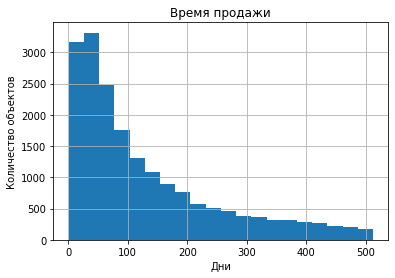

In [38]:
data.hist('days_exposition', bins= 20);
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество объектов')
plt.show()

In [39]:
print('Среднее время продажи:', int(data['days_exposition'].mean()))
print('Медианное время продажи:', int(data['days_exposition'].median()))

Среднее время продажи: 128
Медианное время продажи: 85


**Вывод:** Итак, в среднем, объявление "висит" на сайте до 128 дней. Есть недвижимость, которая продается быстро, буквально в первые дни. Но есть объекты, продажа которых длится несколько месяцев.

<span style="color:blue">**Задание №2: Какие факторы больше всего влияют на общую (полную) стоимость объекта**</span>
- Для того, чтобы увидеть зависимость цены от факторов, воспользуемся построением графиков. Для подготовки данных перед визуализацией будем использовать сводные таблицы
- Рассчитаем корреляцию

<span style="color:brown">**Зависимость цены от общей площади жилья**</span> 

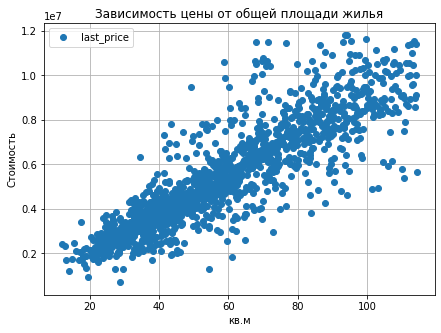

Корреляция: 0.69


In [40]:
data.pivot_table(index= 'total_area', values= 'last_price').plot(grid= True, style= 'o', figsize= (7, 5))
plt.title('Зависимость цены от общей площади жилья')
plt.xlabel('кв.м')
plt.ylabel('Стоимость')
plt.show()
print('Корреляция:', data['last_price'].corr(data['total_area']).round(2))

<span style="color:brown">**Зависимость цены от жилой площади**</span> 

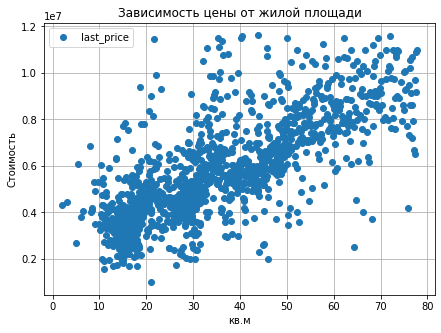

Корреляция: 0.57


In [41]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(7, 5))
plt.title('Зависимость цены от жилой площади')
plt.xlabel('кв.м')
plt.ylabel('Стоимость')
plt.show()
print('Корреляция:', data['last_price'].corr(data['living_area']).round(2))

<span style="color:brown">**Зависимость цены от площади кухни**</span> 

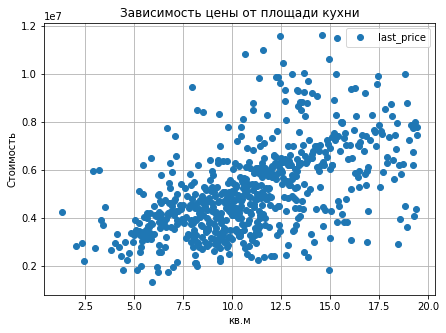

Корреляция: 0.48


In [42]:
data.pivot_table(index= 'kitchen_area', values= 'last_price').plot(grid= True, style= 'o', figsize= (7, 5))
plt.title('Зависимость цены от площади кухни')
plt.xlabel('кв.м')
plt.ylabel('Стоимость')
plt.show()
print('Корреляция:', data['last_price'].corr(data['kitchen_area']).round(2))

<span style="color:brown">**Зависимость цены от количества комнат**</span>

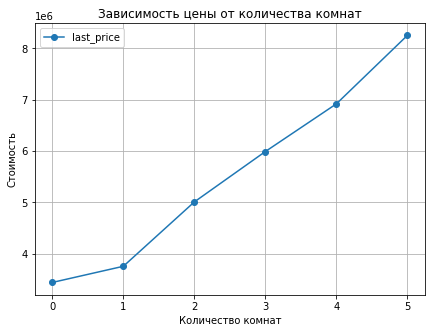

Корреляция: 0.44


In [43]:
data.pivot_table(index= 'rooms', values='last_price').plot(grid= True, style= 'o-', figsize= (7, 5))
plt.title('Зависимость цены от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')
plt.show()
print('Корреляция:', data['last_price'].corr(data['rooms']).round(2))

<span style="color:brown">**Зависимость цены от типа этажа, на котором расположена квартира (первый, последний, другой)**</span>

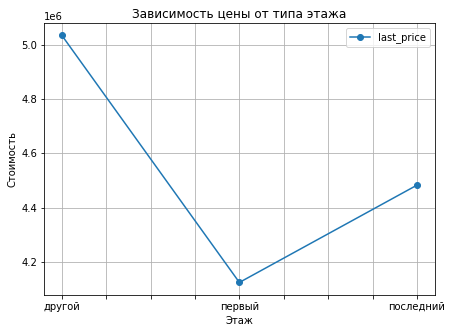

In [44]:
data.pivot_table(index= 'floor_type', values= 'last_price').plot(grid= True, style= 'o-', figsize= (7, 5))
plt.title('Зависимость цены от типа этажа')
plt.xlabel('Этаж')
plt.ylabel('Стоимость')
plt.show()

<span style="color:brown">**Зависимость цены от даты размещения объявления**</span>

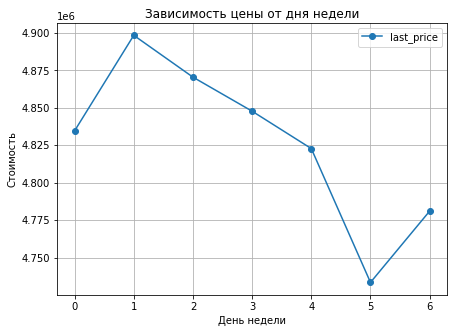

In [45]:
data.pivot_table(index= 'weekday', values= 'last_price').plot(grid= True, style= 'o-', figsize= (7, 5))
plt.title('Зависимость цены от дня недели')
plt.xlabel('День недели')
plt.ylabel('Стоимость')
plt.show()

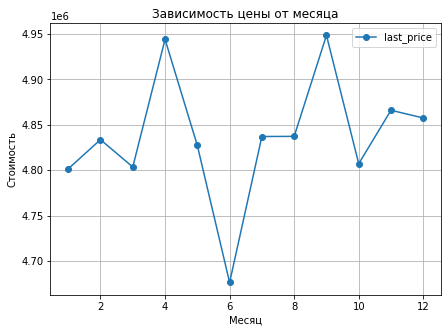

In [46]:
data.pivot_table(index= 'month', values= 'last_price').plot(grid= True, style= 'o-', figsize= (7, 5))
plt.title('Зависимость цены от месяца')
plt.xlabel('Месяц')
plt.ylabel('Стоимость')
plt.show()

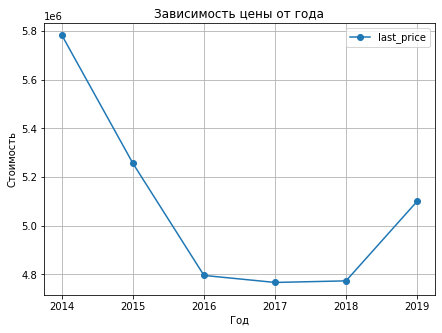

In [47]:
data.pivot_table(index= 'year', values= 'last_price').plot(grid= True, style= 'o-', figsize= (7, 5))
plt.title('Зависимость цены от года')
plt.xlabel('Год')
plt.ylabel('Стоимость')
plt.show()

- Необходимо посмотреть на влияние цены объекта от такого параметра, как "удаленность от центра". Ранее в исследовании, на гистограмме было видно, что большая часть жилья расположена именно в локации ближе к центру. Посмотрим ее вляние на стоимость.*

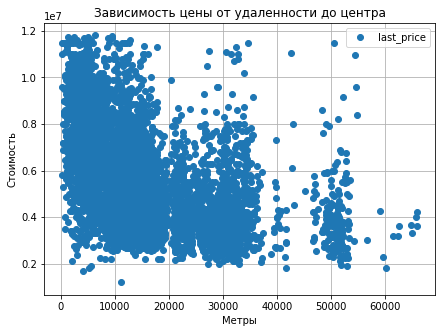

Корреляция: -0.35


In [48]:
data.pivot_table(index='city_centers_nearest', values='last_price').plot(grid=True, style='o', figsize=(7, 5))
plt.title('Зависимость цены от удаленности до центра')
plt.xlabel('Метры')
plt.ylabel('Стоимость')
plt.show()
print('Корреляция:', data['last_price'].corr(data['city_centers_nearest']).round(2))

**Вывод общий:**
1. **Площадь:** Общая и жилая площади напрямую влияют на цену объекта недвижимости: чем больше площадь, тем выше стоимость. Коэффициент корреляции этих параметров находится в диапазоне 0,50-0,74 - это положительная высокая связь факторов. Площадь кухни влияет уже слабее, корреляция 0,48. 
2. **Число комнат** тоже влияет на стоимость жилья: больше комнат - выше цена. Но корреляция всего 0,44. Тут тоже понятно, комнаты по площади разные, бывают и очень маленькие и достаточно большими. Раздельные комнаты важны для определенного спроса. Поэтому такая и зависимость слабее. 
3. **Этаж.** Объекты недвижимости, расположенный на 1-ом этаже гораздо ниже в цене, так было всегда. На последнем этаже - немного дороже первого. Прямо пропорционально растет цена на недвижимость, расположенной не на первом и не на последнем этажах.
4. Зависимости цены от **Времени размещения объявления**. 
5. **В центре города** есть и очень дорогое жилье и варианты подешевле. Корреляция средняя отрицательная, -0,35.    

<span style="color:blue">**Задание №3.Какая самая высокая и низкая стоимость квадратного метра в  10 населённых пунктах с наибольшим числом объявлений.**</span>


In [49]:
town_10_group = data['locality_name'].value_counts().head(10)# создадим список ТОП 10 городов 
town_meter_price = data.query('locality_name in (@town_10_group.index)').pivot_table(index='locality_name', values='square_meter_price')
town_meter_price = town_meter_price.astype(int)# в целочисленное значение
town_meter_price.sort_values('square_meter_price', ascending=False)# осортируем по убыванию

,square_meter_price
locality_name,
Санкт-Петербург,114848
Пушкин,103125
деревня Кудрово,92473
поселок Парголово,90175
поселок Мурино,85681
поселок Шушары,78676
Колпино,75424
Гатчина,68745
Всеволожск,68654


**Вывод:** 
1. Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге, 114 848 за кв.м., и это не удивительно.
2. В г. Пушкин жилье чуть дешевле, но ненамного, 103 125 за кв.м.. Пушкин - крупный туристический, научный, учебный и военно-промышленный центр. Включён в список памятников, охраняемых ЮНЕСКО. Этим и обусловлена цена на жилье.
3. Далее, по мере убывания в рейтинге, населенные пункты, которые расположены от СПб на расстоянии до 20 км. Это, фактически, сам город. Цена снижается до 75 424 за кв.м.
3. Наименьшая стоимостьз в Гатчине; 68 745 за кв.м., Всеволожске; 68 654 за кв.м., и Выборге: 58 141 за кв.м.. Это районы, из которых нужно добираться до Санкт-Петербурга не менее 40- 60 минут, из Выборга до 2 часов на машине. 

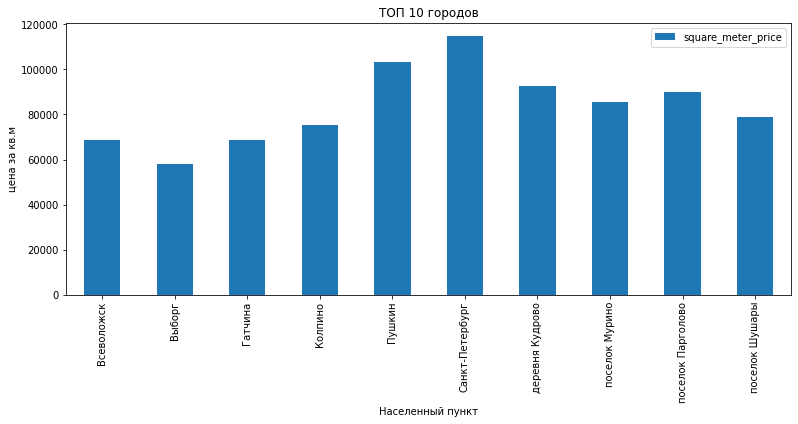

In [50]:
(
    data.query('locality_name in (@town_10_group.index)').
    pivot_table(index='locality_name', values='square_meter_price').
    plot(kind='bar', xlim=(0,10), figsize=(13, 5), )
)
plt.title('ТОП 10 городов')
plt.xlabel('Населенный пункт')
plt.ylabel('цена за кв.м')
plt.show()

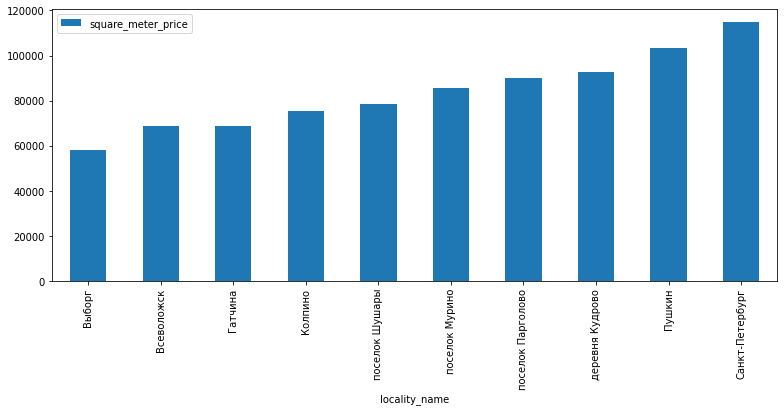

In [51]:
#сортируем по возрастанию
(
    data.query('locality_name in (@town_10_group.index)').
    pivot_table(index='locality_name', values='square_meter_price').
    sort_values(by='square_meter_price').
    plot(kind='bar', xlim=(0,10), figsize=(13, 5), )
);


<span style="color:blue">**Задание №4: Как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге.**</span>

- **'distance_to_center'** - расстояние до центра, км. Воспользуемся "Бритвой Оккама". Посторим столбчатую диаграмму.

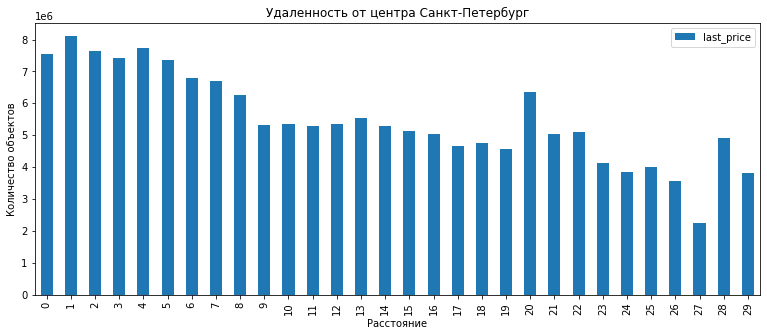

In [52]:
(
    data.query('locality_name == "Санкт-Петербург"').
    pivot_table(index='distance_to_center',values='last_price',aggfunc='mean')
    .plot(kind='bar', xlim=(0,5), figsize=(13, 5))
)
plt.title('Удаленность от центра Санкт-Петербург')
plt.xlabel('Расстояние')
plt.ylabel('Количество объектов')
plt.show()

**Вывод:**
1. Самая высокая цена на недвижимость в центре города.
2. По мере увеличения расстояния  от ценра цена снижается, но остается высокой, ориентировочно, до 8 км.
3. Далее цены заметно ниже средней стоимости жилья, 6 млн., падают до 4 млн.
4. Есть некоторые районы на удалении 20-22км (там будут сроить КАД-2), и 28 км. - это жилье с видом на Неву.

**ОБЩИЙ ВЫВОД:**

Нами было проведено исследование, задачей которого было установить параметры, определяющие рыночную стоимость объектов недвижимости. 

Входные данные от сервиса **Яндекс.Недвижимость** — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.

Результаты исследования позволят построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

Необходимо было определить:
1. Сколько времени обычно занимает продажа недвижимости. Какие сделки можно считать быстрыми, а какие — долгими.
2. Какие факторы больше всего влияют на общую (полную) стоимость объекта
3. Какая самая высокая и низкая стоимость квадратного метра в ТОП-10 населённых пунктах с наибольшим числом объявлений. 
4. Как стоимость объектов зависит от расстояния до центра города в Санкт-Петербурге. 

Проведя исследования по предоставленным данным, выявили следующее:

**Задача №1:** 
 
   - В среднем продажа объекта занимает до 128 дней.
   - Медианное значение -85 дней.
   - Сделки менее 30 дней можно считать быстрыми.
   - Долгие продажи - от нескольких месяцев, в нашем случае от полугода.

**Задача №2:** 
   
   - Общая и жилая площади напрямую влияют на цену объекта недвижимости: чем больше площадь, тем выше стоимость. 
   - Число комнат тоже влияет на стоимость жилья: больше комнат - выше цена. 
   - Объекты недвижимости, расположенный на 1-ом этаже гораздо ниже в цене. Далее по возрастанию жилье на последнем этаже. Прямо пропорционально растет цена на недвижимость, расположенной не на первом и не на последнем этажах.
   - Цена не зависит от времени размещения объявления нет. 
   - В центре города есть и очень дорогое жилье и варианты подешевле.    

**Задача №3:** 
   
- Самая высокая средняя стоимость квадратного метра в Санкт-Петербурге, 114 848 за кв.м.
- Наименьшая стоимостьз в Гатчине; 68 745 за кв.м., Всеволожске; 68 654 за кв.м., и Выборге: 58 141 за кв.м.. 

**Задача №4:** 

- Самая высокая цена на недвижимость в центре города.
- Цены заметно ниже после 8 км удаленности отцентра.
- Есть некоторые районы на удалении 20-22км (там будут сроить КАД-2), и 28 км. по цене близкой к центру города.

**ОБЩИЕ РЕКОМЕНДАЦИИ**
1. Прежде, чем провести исследование, много времени ушло на обработку данных: много некорректных значений. Поэтому, в дальнейшем, лучше скорректировать файл насколько возможно: заполнить пропуски, или просмотреть значения на разрядность.
2. Для неявных дубликатов: изначально сформировать словарь с названиями населенных пунктов.
3. Добавить для исследования такой параметр, как "удаленность от станции метро".

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод